# **CIS 520: Machine Learning, Fall 2022**

## **Bias and Variance**


- **Content Creators:** Kenneth Shinn, Siyun Hu
- **Content Reviewers:** Lyle Ungar, Michael Zhou, Zihan Zhou, Parth Sheth
    
As we know from lecture, there is a tradeoff between a model's bias and variance. In this worksheet, we take a look at this trade off in action. 

- **Objectives:** This notebook helps you understand: 

  - how model complexity affects bias and variance 
  - how regularization term affects bias and variance
  - how the number of observations affects bias and variance

       

### Imports and PennGrader (DO NOT CHANGE THESE CELLS)

In [1]:
%%capture
!pip install penngrader

In [2]:
# run below
!pip install mlxtend
%pip install mlxtend --upgrade

# if you're on a mac, and the above throws an error, uncomment and run below
# pip3 install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 15.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [3]:
import os
import sys
import pandas as pd
import numpy as np
from random import uniform
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import statistics 
from mlxtend.evaluate import bias_variance_decomp

In [4]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Insert PennID Here!

In [5]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [6]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_Bias_Variance_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [7]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## **Data Preparation**

First let's construct a model and generate some data. The function below uses the simple model $y = x$, and adds an error term $\epsilon \sim N(0,25)$. Our goal over this worksheet is to see how adjusting model complexity and $n$ (the number of observations) changes model bias and variance. 

In [8]:
# let's generate some data
# returns X_train, y_train, X_test, y_test 
def generate_data(n_train, n_test):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    all_x_train = np.linspace(-10,10,n_train)
    all_x_test = np.linspace(-10, 10, n_test)
    
    for x in all_x_train:
        X_train.append(x)
        y_train.append(x + np.random.normal(0, 5^2))

    for x in all_x_test:
        X_test.append(x)
        y_test.append(x + np.random.normal(0, 5^2))
        
    X_train = np.array(X_train).reshape(-1, 1)
    y_train = np.array(y_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test


## **Bias vs. Variance (Model Complexity)**

Here the model complexity will be determined by the polynominal degree. That is, a polynominal of degree 2 will assume the model to be $y = \beta_0 + \beta_1 x + \beta_2 x^2$.

The code below will pull some data from the above data generator and train a model of degree $d$. You can run the code multiple times to see how the model will change depending on the degree of the trained model. Now consider the following questions:

* Do you expect a higher or lower degree to result in a greater change between instances?
* From our theory, would you expect the bias to go up or down as the degree increases? How about the variance? What about the MSE?

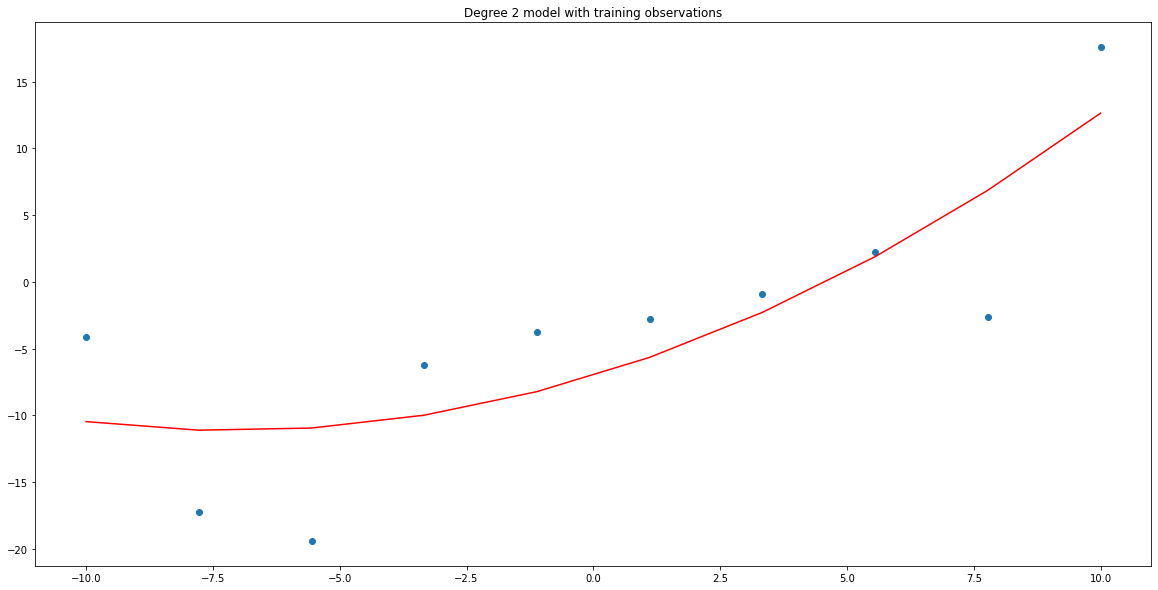

MSE: 73.30
Bias: 39.31
Variance: 33.99


In [9]:
# change the parameters here, d is the degree, n is the number of observations
d = 2
n = 10
# *****************************

X_train, y_train, X_test, y_test = generate_data(n, n)
X_train_poly = PolynomialFeatures(degree=d).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=d).fit_transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly,y_train)
y_pred_poly = lm.predict(X_train_poly)

sorted_zip = sorted(zip(X_train,y_pred_poly), key = lambda x: x[0])
X_train, y_pred_poly = zip(*sorted_zip)

plt.figure(figsize=(20, 10))
plt.title('Degree ' + str(d) + ' model with training observations')
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_poly, color = 'red')
plt.show()
mse, bias, var = bias_variance_decomp(lm, X_train_poly, y_train.flatten(), X_test_poly, y_test.flatten(), loss='mse', num_rounds=200, random_seed=1)

print('MSE: ' + str("%.2f" % mse))
print('Bias: ' + str("%.2f" %bias))
print('Variance: ' + str("%.2f" %var))

### *Question 1*
Effect of model complexity on bias, variance and loss

In [10]:
degrees = [0, 2, 3, 5]
num_of_iterations = 15
n = 50

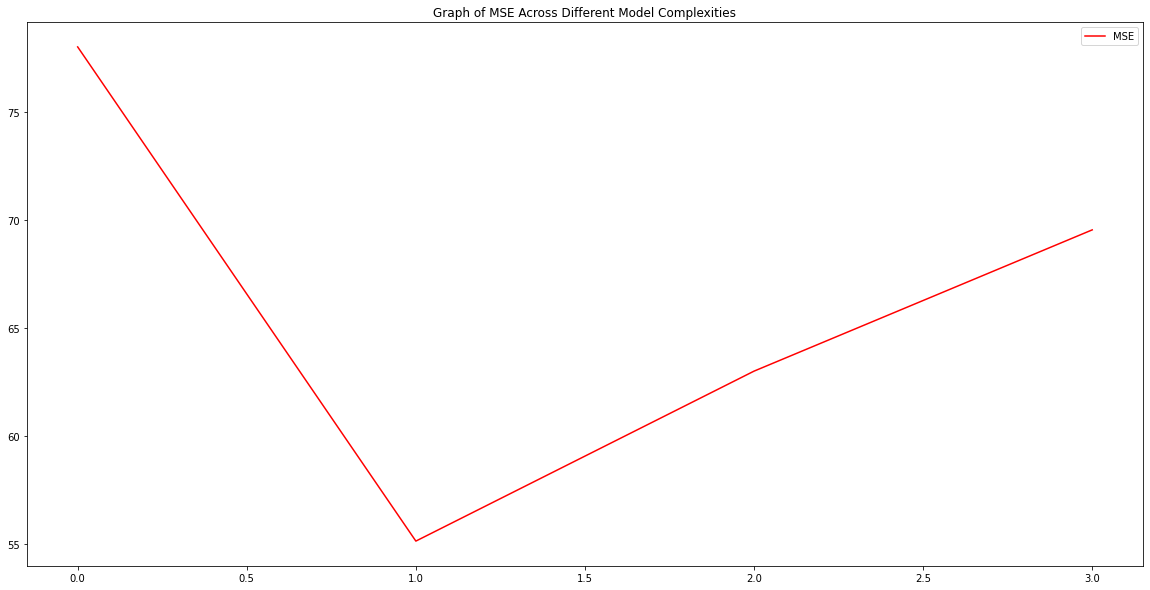

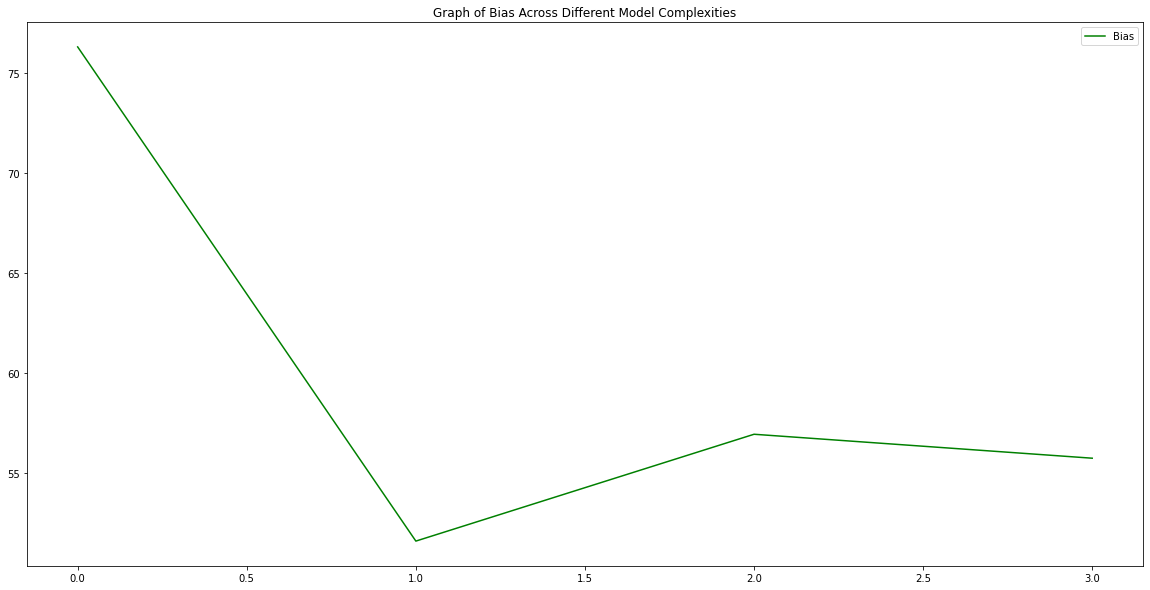

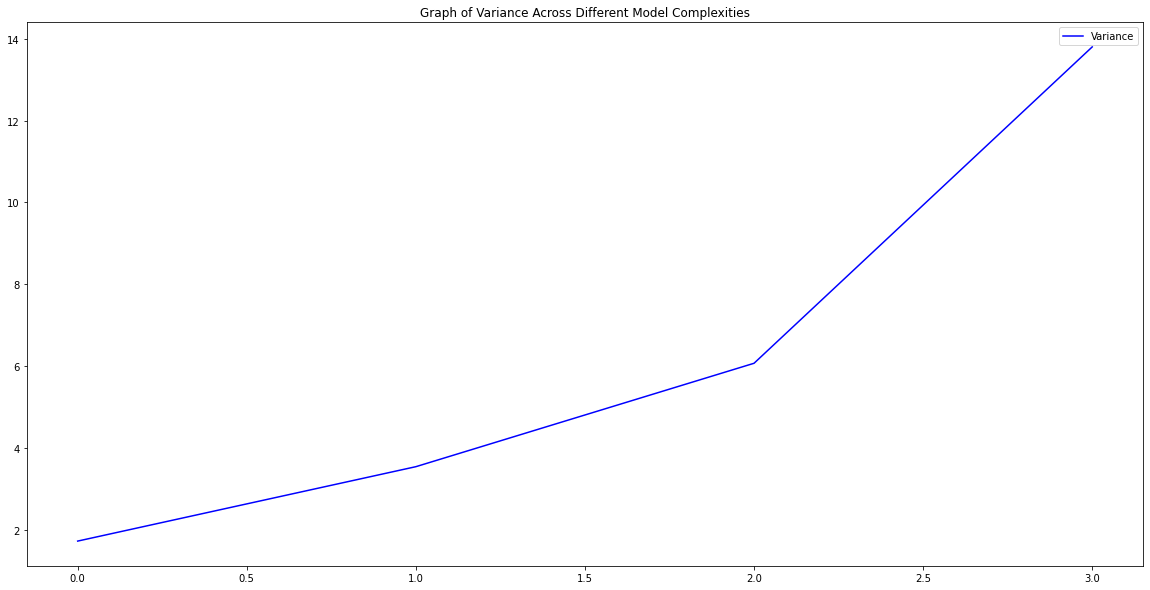

In [11]:
avg_mse_list = []
avg_bias_list = []
avg_variance_list = []

for d in degrees:
    mse_list = []
    bias_list = []
    variance_list = []
    for i in range(num_of_iterations):
        X_train, y_train, _, _ = generate_data(n, n)
        X_train_poly = PolynomialFeatures(degree=d).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(degree=d).fit_transform(X_test)

        lm = LinearRegression()
        mse, bias, var = bias_variance_decomp(lm, X_train_poly, y_train.flatten(), X_test_poly, y_test.flatten(), loss='mse', num_rounds=1000, random_seed=1)

        mse_list.append(mse)
        bias_list.append(bias)
        variance_list.append(var)
    
    avg_mse_list.append(statistics.mean(mse_list))
    avg_bias_list.append(statistics.mean(bias_list))
    avg_variance_list.append(statistics.mean(variance_list)) 

plt.figure(figsize=(20, 10))
plt.plot(avg_mse_list, color = 'red',label="MSE")
plt.title('Graph of MSE Across Different Model Complexities')
plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(avg_bias_list, color = 'green', label= "Bias")
plt.title('Graph of Bias Across Different Model Complexities')
plt.legend()
plt.show()


plt.figure(figsize=(20, 10))
plt.plot(avg_variance_list, color = 'blue', label= "Variance")
plt.title('Graph of Variance Across Different Model Complexities')
plt.legend()
plt.show()

Describe how the 1) average bias and 2) variance changes as the model complexity increases (defined by degree).

Option 1: Increases

Option 2: Decreases

Option 3: Remains the same

(Return the answer as a vector of length 3. eg)[1,2] for bias increases and variance decreases)

In [12]:
answers1 = [2,1]
grader.grade(test_case_id = 'test_case_model_complexity',answer=answers1)

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Regularization and Bias/Variance**

Now, let's take a look at how regularization affects model bias and variance. Here, we will use Ridge regression (L2 regularization) and adjust the regularization strength $\lambda$ to see how it affects bias and variance. 




### *Question 2*

We provide you with the sample code as follows. By altering $\lambda$, you could observe how it affects the slope of the linear model, as well as the bias and variance.

In [13]:
X_train, y_train, X_test, y_test = generate_data(n, n)

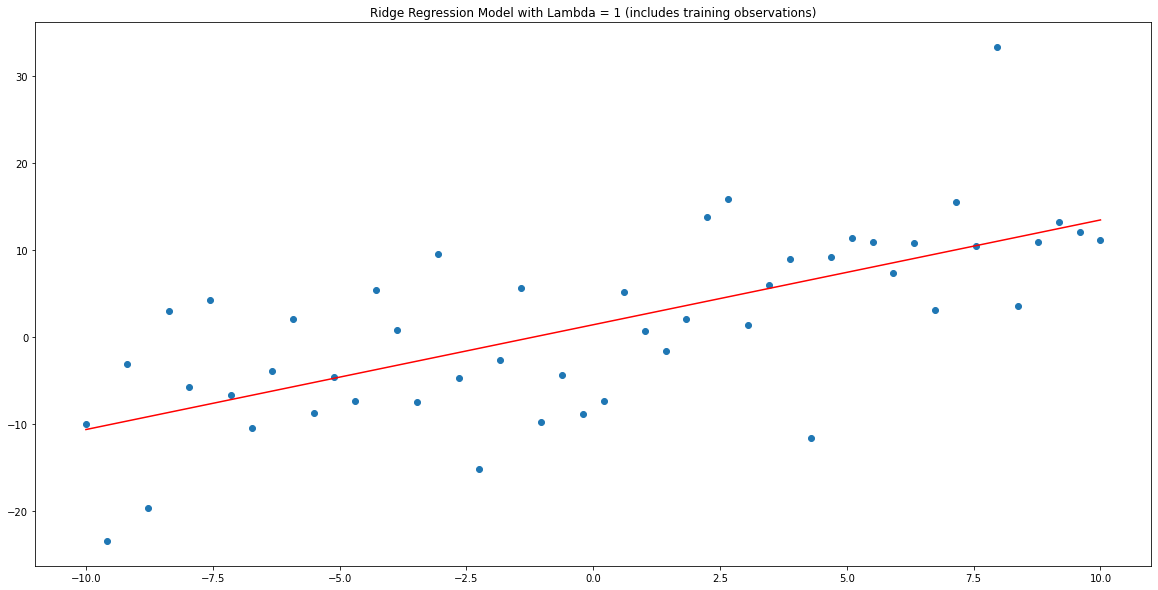

MSE: 65.97
Bias: 63.38
Variance: 2.59


In [19]:
#### To Do: change the parameters here ####
# lmda is lambda, n is the number of observations
lmda = 1
n = 100

rlm = Ridge(lmda)
rlm.fit(X_train,y_train)
y_pred = rlm.predict(X_train)

plt.figure(figsize=(20, 10))
plt.title('Ridge Regression Model with Lambda = ' + str(lmda) + ' (includes training observations)')
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color = 'red')
plt.show()

mse, bias, var = bias_variance_decomp(rlm, X_train, y_train.flatten(), X_test, y_test.flatten(), loss='mse', num_rounds=200, random_seed=1)

print('MSE: ' + str("%.2f" %mse))
print('Bias: ' + str("%.2f" %bias))
print('Variance: ' + str("%.2f" %var))


How does an increase in 𝜆  affect the 1) slope of the linear model, as well as the 2)bias and 3)variance?

Option 1: Increases

Option 2: Decreases

Option 3: Remains the same

(Return the answer as a vector of length 3. eg)[1,1,2] for slope increases, bias increases and variance decreases)*italicized text*

In [22]:
answers2 = [2, 1, 2]
grader.grade(test_case_id = 'test_case_lambda',answer=answers2)

Correct! You earned 3.0/3.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Number of Observations and Bias/Variance**

Before you run the following cell, let's think one question:

- As the number of observations increases, how will the variance of model change in theory?
- As the number of observations increases, how will the bias of model change in theory?


### *Question 3*

If the degree (model complexity) is constant, by altering `n`, you could see how the bias and variance changes along with the number of observations. Describe your findings.

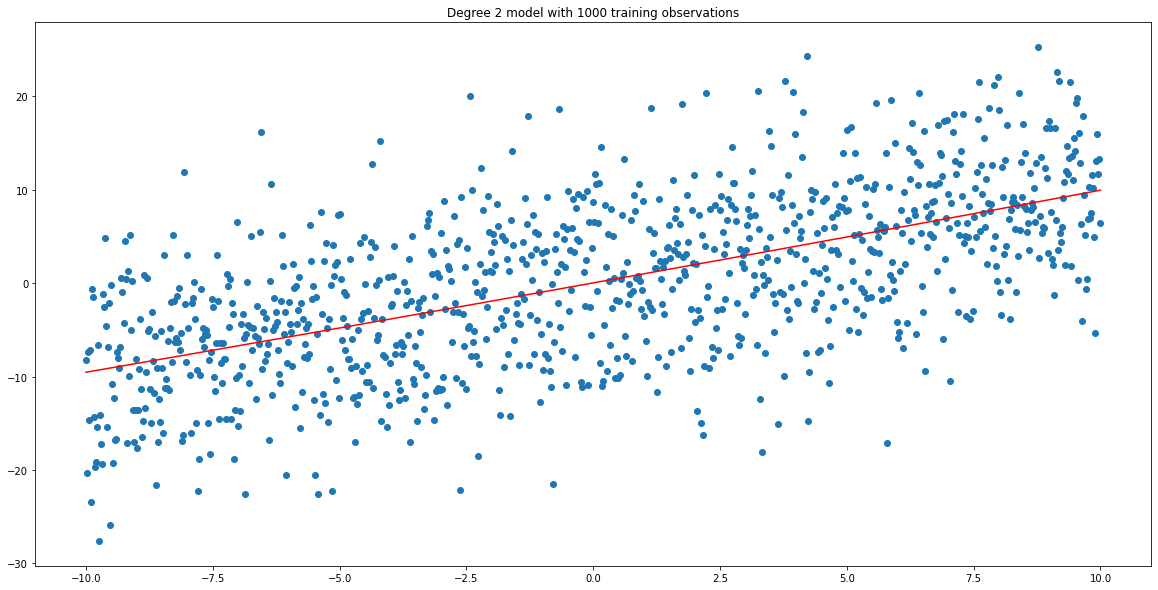

MSE: 47.67
Bias: 47.53
Variance: 0.15


In [23]:
# you could change the parameters here
# d is the degree, n is the number of observations
d = 2
n = 1000
# *****************************
X_train, y_train, X_test, y_test = generate_data(n, n)
X_train_poly = PolynomialFeatures(degree=d).fit_transform(X_train)
X_test_poly = PolynomialFeatures(degree=d).fit_transform(X_test)
lm = LinearRegression()
lm.fit(X_train_poly,y_train)
y_pred_poly = lm.predict(X_train_poly)

sorted_zip = sorted(zip(X_train,y_pred_poly), key = lambda x: x[0])
X_train, y_pred_poly = zip(*sorted_zip)

plt.figure(figsize=(20, 10))
plt.title('Degree ' + str(d) + ' model with ' + str(n) + ' training observations')
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_poly, color = 'red')
plt.show()
mse, bias, var = bias_variance_decomp(lm, X_train_poly, y_train.flatten(), X_test_poly, y_test.flatten(), loss='mse', num_rounds=200, random_seed=1)

print('MSE: ' + str("%.2f" %mse))
print('Bias: ' + str("%.2f" %bias))
print('Variance: ' + str("%.2f" %var))

How do 1)bias and 2)variance change along with the number of observations given that the degree (model complexity) is constant?

Option 1: Increases

Option 2: Decreases

Option 3: Remains the same

(Return the answer as a vector of length 3. eg)[1,2] for bias increases and variance decreases)

In [26]:
answers3 = [1,2]
grader.grade(test_case_id = 'test_case_n_obs',answer=answers3)

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Deep dive into the effects of $n$ on variance

Below, we dive deep into the effect of `n` on model variance. We keep the model degree constant (5), and vary the number of observations. Given the model complexity and the number of observations, we train the model for 5 times and visualize the results. 

In [27]:
degrees = 5
num_of_iterations = 5
num_of_observations = [10, 100, 1000, 10000, 100000]

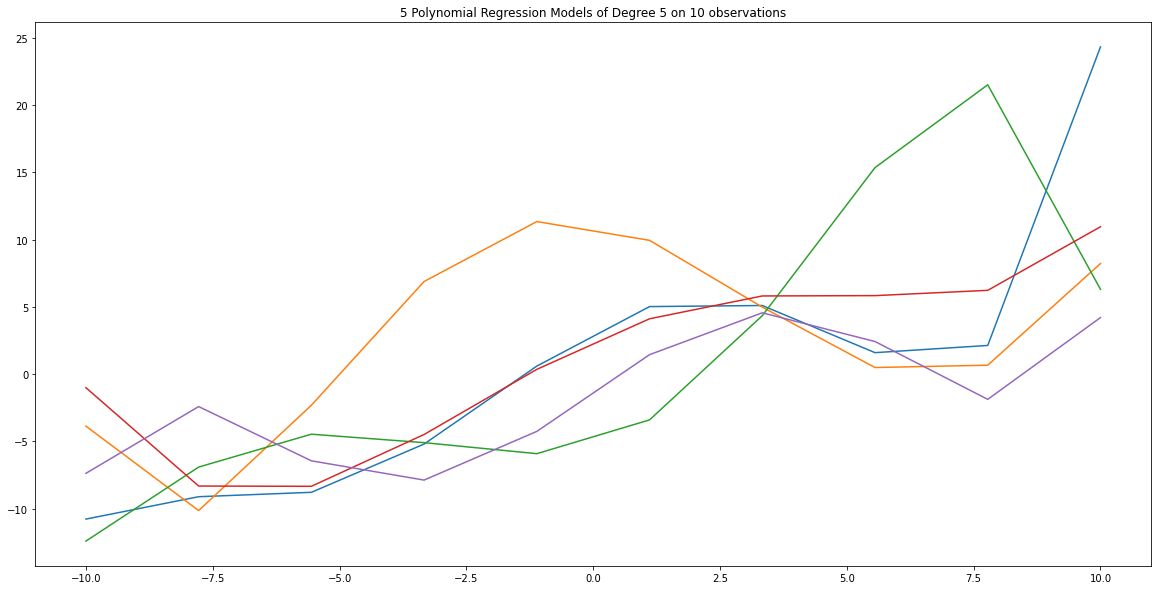

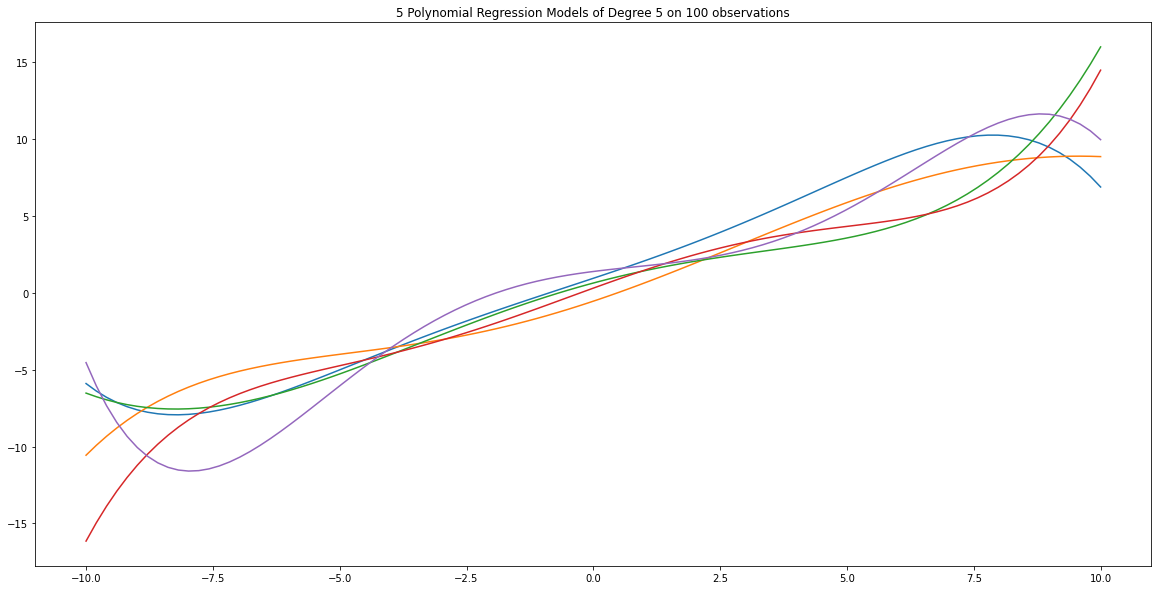

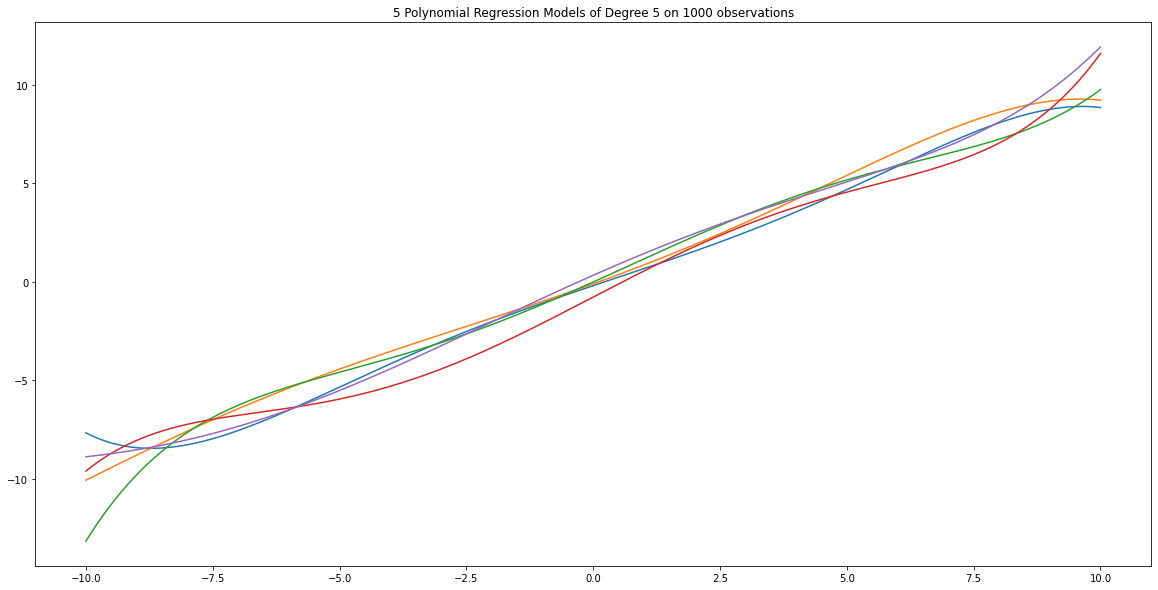

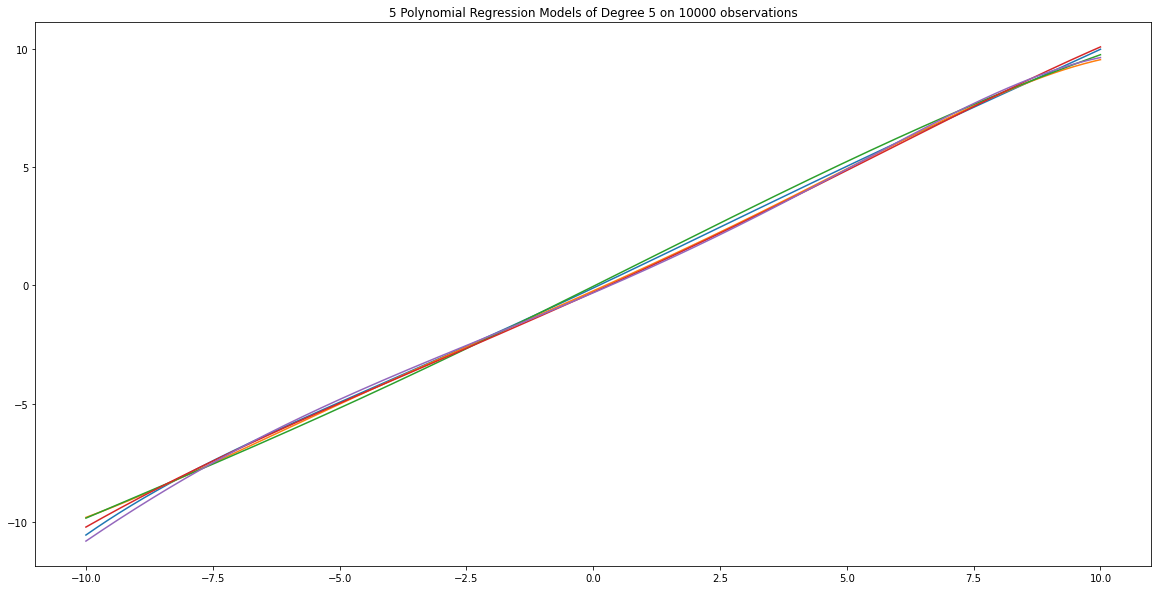

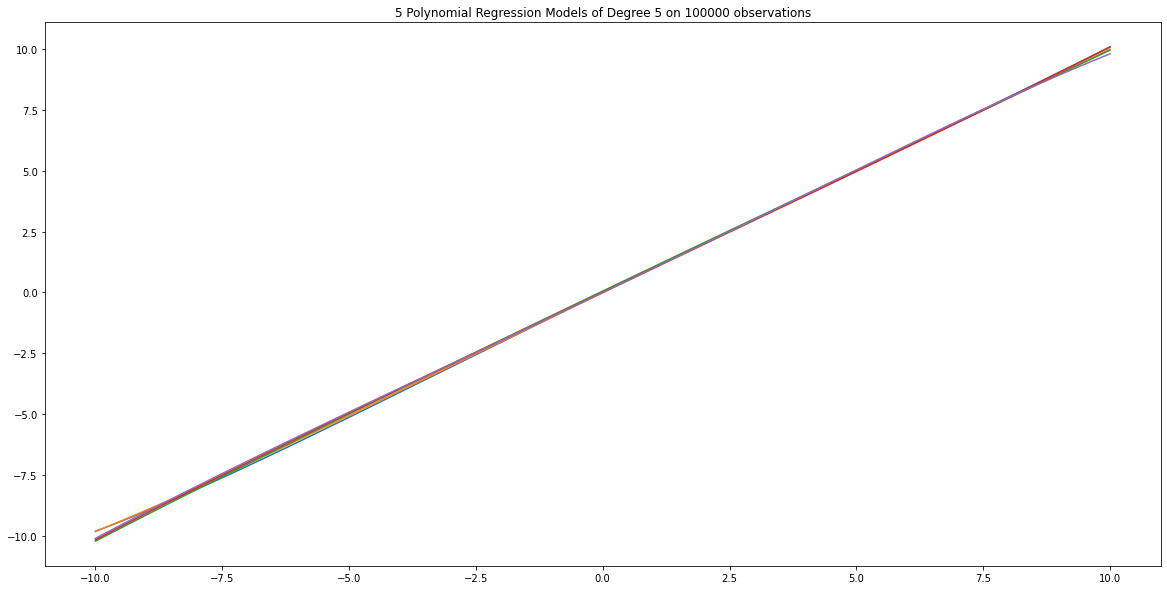

In [28]:
for n in num_of_observations:
    plt.figure(figsize=(20, 10))
    for _ in range(num_of_iterations):
        X_train, y_train, X_test, y_test = generate_data(n, n)
        X_train_poly = PolynomialFeatures(degree=degrees).fit_transform(X_train)

        lm = LinearRegression()
        lm.fit(X_train_poly,y_train)
        y_pred_poly = lm.predict(X_train_poly)
        sorted_zip = sorted(zip(X_train,y_pred_poly), key = lambda x: x[0])
        X_train, y_pred_poly = zip(*sorted_zip)
        plt.plot(X_train, y_pred_poly)
    
    plt.title(str(num_of_iterations) + ' Polynomial Regression Models of Degree ' + str(degrees) + ' on '+ str(n)+ ' observations' )
    plt.show()


By comparing the plots of different n, think about what kind of insights or trends do you find and what this result implies.

### *Question 4*

In the notebook, we explore the bias and variance for a polynomial regression model. Can the conclusions we draw from this simple model be applied to other models, such as KNN and Decision Tree?

What would happen to 1)model bias and 2)variance if we increase the n_neighbors in KNN algorithm?

Option 1: Increases

Option 2: Decreases

Option 3: Remains the same

(Return the answer as a vector of length 3. eg)[1,3] for bias increases and variance remains the same)

In [29]:
answers4 = [1,2]
grader.grade(test_case_id = 'test_case_knn',answer=answers4)

Correct! You earned 2.0/2.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Submitting to the Autograder

Now go to the File menu and choose "Download .ipynb".  Go to [Gradescope](https://www.gradescope.com/courses/409970) and:

1. From "File" --> Download both .ipynb and .py files
1. Name these files `Bias_Variance_WS.ipynb` and `Bias_Variance_WS.py` respectively
1. Sign in using your Penn email address (if you are a SEAS student we recommend using the Google login) and ensure  your class is "CIS 5200"
1. Select **Worksheet: Bias Variance**
1. Upload both files
1. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!

You should be set! Note that this assignment has 9 autograded points that will show up upon submission. Points are awarded based on a combination of correctness and sufficient effort.